![](https://i.pinimg.com/564x/a5/62/c5/a562c5e39f084d61a97553183dede0c4.jpg)

# Classifiers

Kevin J. Walchko, Phd

23 Dec 2020

---

This notebook takes a set of data and applies several linear and non-linear classifiers. The data set is a simple one, with two independent variables (age and salary) and one dependent variable (did a customer buy a product).

Below are plots of the resulting models which are trying to predict (or classify) if a customer, based on age and income, will buy a product. The outcome is not a continous value, but rather a boolean (true/false or yes/no) in this case. 

<table>
  <tr>
    <th>Training Dataset</th>
    <th>Test Dataset</th>
  </tr>
  <tr>
    <td><img src="logrithmic-pics/train.png"></td>
    <td><img src="logrithmic-pics/test.png"></td>
  </tr>
  <tr>
    <td><img src="knn-pics/training.png"></td>
    <td><img src="knn-pics/test.png"></td>
  </tr>
  <tr>
    <td><img src="svm-pics/train.png"></td>
    <td><img src="svm-pics/test.png"></td>
  </tr>
  <tr>
    <td><img src="ksvm-pics/train.png"></td>
    <td><img src="ksvm-pics/test.png"></td>
  </tr>
  <tr>
    <td><img src="decision-tree-pics/train.png"></td>
    <td><img src="decision-tree-pics/test.png"></td>
  </tr>
  <tr>
    <td><img src="random-forest-pics/train.png"></td>
    <td><img src="random-forest-pics/test.png"></td>
  </tr>
</table>

A summary of the results for each classifier is below. Since the data points for
"buy" or "don't buy" are very intertwined, it is difficult to draw a straight line
through the points separating them. Therefore it is expected that linear models
will not perform as well as nonlinear models.

| Name                | Type      |Accuracy |
|---------------------|-----------|-----|
| Logistic Regression | linear    | 89% |
| K-Nearest Neighbor  | nonlinear | 93% |
| SVM                 | linear    | 90% |
| Kernel SVM          | nonlinear | 93% |
| Decision Tree       | nonlinear | 91% |
| Random Forest       | nonlinear | 91% |

The last two nonlinear models do not perform as well as expected, this is probably
due to over fitting of the training set. Notice in the pictures above, how there
are sever "little islands" of different colors trying to capture all of the training
data. However, when the test data is applied, all of those islands do not perform
well. Here, the KNN and Kernal SVM which are able to weave a "smooth" line through
the data out performs the others.

## References

- Machine Learning class on udemy.com
- wikipedia: [k-nearest neighbors algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
- [Machine Learning Basics with the K-Nearest Neighbors Algorithm](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)

In [2]:
import numpy as np
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import pandas as pd

from colorama import Fore

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
def evaluate(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)
    print("-------------------")
    print(f"{Fore.GREEN}True Positives (TP): {cm[0,0]}")
    print(f"True Negatives (TN): {cm[1,1]}")
    print(f"{Fore.RED}False Positives (FP): {cm[0,1]}")
    print(f"False Negatives (FN): {cm[1,0]}{Fore.RESET}")
    print("-------------------")
    print(f"Accuracy: {100*accuracy_score(y_test, y_pred)}%")

    print(f"Prediction: {lr.predict(sc.transform([[30,87000]]))}")

# Data Conditioning

In [4]:
# dataset describing the age and salary of people who
# purchased something from an advertisement. The Purchased
# data is just binary signifying if a purchase was made.
dataset = pd.read_csv('../datasets/Social_Network_Ads.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
# here we are removing the binary "Purchased" value
# because the results are meaningless for it
dataset[["Age","EstimatedSalary"]].describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [5]:
# so looking at the dataset, our independent variables (X) 
# are Age and Salary, while our dependent variable (Y) is
# did they purchase a product or not.
X = dataset.iloc[:, :-1].values # grab everything upto the last column
y = dataset.iloc[:, -1].values  # grab the last column

x_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size = 0.25, # reserve 25% of data for testing
    random_state = 0) # random_state initializes the seed to 0 everytime

Mean values are: [   38.13 69583.33]


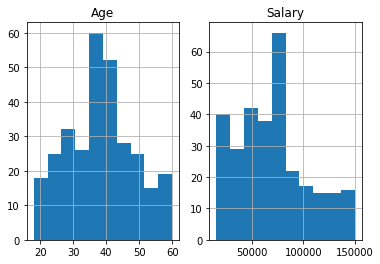

In [6]:
mv = np.mean(x_train,axis=0)
print(f"Mean values are: {mv}")

plt.subplot(1,2,1)
plt.hist(x_train[:,0])
plt.grid(True)
plt.title("Age");

plt.subplot(1,2,2)
plt.hist(x_train[:,1])
plt.grid(True)
plt.title("Salary");

In [7]:
# note again, it is just binary output of:
#    0 - didn't purchase
#    1 - did purchase
print(y_train)

[0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0]


## Feature Scaling

Below, we are going to scale the `x_train` and `x_test` datasets because the numbers within them are in completely different ranges. 

You might ask, "why don't we scale the y output" ... well look at it above. It is already scaled from \[0,1\] ... no need to do anything. If this data HAD other values (like \[-30,215\] for example) then we would have scaled it. 

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(X_test)

Mean values are: [0. 0.]


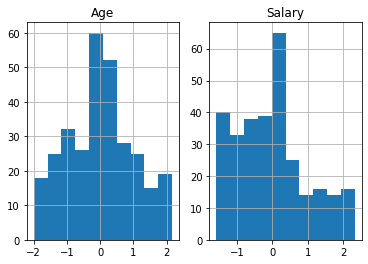

In [9]:
mv = np.mean(X_train,axis=0)
print(f"Mean values are: {mv}")

plt.subplot(1,2,1)
plt.hist(X_train[:,0])
plt.grid(True)
plt.title("Age");

plt.subplot(1,2,2)
plt.hist(X_train[:,1])
plt.grid(True)
plt.title("Salary");

# Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

evaluate(y_test, y_pred)

Confusion Matrix:
 [[65  3]
 [ 8 24]]
-------------------
True Positives (TP): 65
True Negatives (TN): 24
False Positives (FP): 3
False Negatives (FN): 8
-------------------
Accuracy: 89.0%
Prediction: [0]


## K-Nearest Neighbor

The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems. The algorithm assumes that similar things exist in close proximity to each other as shown below.

![](knn-pics/knn-plot.png)

KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).

### References

- wikipedia: [k-nearest neighbors algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
- [Machine Learning Basics with the K-Nearest Neighbors Algorithm](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

evaluate(y_test, y_pred)

Confusion Matrix:
 [[64  4]
 [ 3 29]]
-------------------
True Positives (TP): 64
True Negatives (TN): 29
False Positives (FP): 4
False Negatives (FN): 3
-------------------
Accuracy: 93.0%
Prediction: [0]


# Support Vector Machine (SVM)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/300px-SVM_margin.png)

SVM tries to draw a linear line through the dataset with a boundry (dotted line in image above). The vectors which lie on this boundry are the supporting vectors and give this method its name.

### References

- wikipedia: [Support vector machine](https://en.wikipedia.org/wiki/Support_vector_machine)

In [12]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

evaluate(y_test, y_pred)

Confusion Matrix:
 [[66  2]
 [ 8 24]]
-------------------
True Positives (TP): 66
True Negatives (TN): 24
False Positives (FP): 2
False Negatives (FN): 8
-------------------
Accuracy: 90.0%
Prediction: [0]


# Kernel SVM

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Kernel_Machine.svg/512px-Kernel_Machine.svg.png)

Kernel SVM does a similar thing to the standard SVM, except, it uses a nonlinear kernel to map the dataset into a new space where the SVM method can be applied. In the picture above, the original nonlinear divide between black/white dots is transformed into a linear one via the kernel.

### References

- wikipedia: [Support vector machine](https://en.wikipedia.org/wiki/Support_vector_machine)

In [13]:
from sklearn.svm import SVC
ksvm = SVC(kernel = 'rbf', random_state = 0)
ksvm.fit(X_train, y_train)

y_pred = ksvm.predict(X_test)

evaluate(y_test, y_pred)

Confusion Matrix:
 [[64  4]
 [ 3 29]]
-------------------
True Positives (TP): 64
True Negatives (TN): 29
False Positives (FP): 4
False Negatives (FN): 3
-------------------
Accuracy: 93.0%
Prediction: [0]


# Decision Trees

![](https://miro.medium.com/max/360/1*XMId5sJqPtm8-RIwVVz2tg.png)

### References

- [Decision Trees in Machine Learning](https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052)
- wikipedia: [Decision tree learning](https://en.wikipedia.org/wiki/Decision_tree_learning)

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

evaluate(y_test, y_pred)

Confusion Matrix:
 [[62  6]
 [ 3 29]]
-------------------
True Positives (TP): 62
True Negatives (TN): 29
False Positives (FP): 6
False Negatives (FN): 3
-------------------
Accuracy: 91.0%
Prediction: [0]


# Random Forest

![](https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png)

### References

- wikipedia: [Random forest](https://en.wikipedia.org/wiki/Random_forest)

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

evaluate(y_test, y_pred)

Confusion Matrix:
 [[63  5]
 [ 4 28]]
-------------------
True Positives (TP): 63
True Negatives (TN): 28
False Positives (FP): 5
False Negatives (FN): 4
-------------------
Accuracy: 91.0%
Prediction: [0]
